<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Natural Language Processing
## Embedding custom with Gensim



In [2]:
# Development based on notebook and information provided on the subject NLP - CEIA - UBA - 2023

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import platform
import multiprocessing
from gensim.models import Word2Vec

!pip install nbformat 


### Data

In [4]:
# Read the dataset 
df = pd.read_csv('./data/datasets/ukraine.csv', sep=',')
df.head()

,TITLE,ARTICLE LINK,PUBLISHED DATE (UTC),AUTHOR,PUBLISHER,COUNTRY,CATEGORY,LANGUAGE,DESCRIPTION,IMAGE URL,VIDEO URL
0,"""Independent Belarusian Filmmakers Condemn Rus...",https://www.hollywoodreporter.com/news/general...,01-03-2022 13:53:11,Scott Roxborough,The Hollywood Reporter,United States Of America,Top,English,"A group of Belarusian filmmakers, many of whom...",NaN,NaN
1,"""UK bars stop pouring Russian vodka over Ukrai...",https://ca.sports.yahoo.com/news/uk-bars-stop-...,01-03-2022 13:53:02,NaN,Yahoo! News,Canada,Sports,English,NaN,NaN,NaN
2,"""Iggy Pop and Bring Me The Horizon cancel show...",https://www.nme.com/news/music/iggy-pop-and-br...,01-03-2022 13:50:51,Tom Skinner,Nme,Canada,Entertainment,English,"""We will be using our platform and voice to do...",NaN,NaN
3,"""British father makes it to wife and son after...",https://ca.sports.yahoo.com/news/british-fathe...,01-03-2022 13:50:48,NaN,Yahoo! News,Canada,Sports,English,NaN,NaN,NaN
4,"""Russia, Ukraine to hold second round of talks...",https://nationalpost.com/pmn/news-pmn/crime-pm...,01-03-2022 13:50:09,Reuters,National Post,Canada,Top,English,MOSCOW — The second round of Russia-Ukraine ta...,NaN,NaN


In [5]:
df.drop(['AUTHOR', 'PUBLISHER', 'COUNTRY', 'CATEGORY','IMAGE URL', 'VIDEO URL', 'ARTICLE LINK', 'PUBLISHED DATE (UTC)'],  axis='columns', inplace=True)

In [6]:
df.head()

,TITLE,LANGUAGE,DESCRIPTION
0,"""Independent Belarusian Filmmakers Condemn Rus...",English,"A group of Belarusian filmmakers, many of whom..."
1,"""UK bars stop pouring Russian vodka over Ukrai...",English,NaN
2,"""Iggy Pop and Bring Me The Horizon cancel show...",English,"""We will be using our platform and voice to do..."
3,"""British father makes it to wife and son after...",English,NaN
4,"""Russia, Ukraine to hold second round of talks...",English,MOSCOW — The second round of Russia-Ukraine ta...


In [7]:
df.isna().sum().sum()

1115

In [8]:
print("Number of documents:", df.shape[0])

Number of documents: 8678


### 1 - Preprocessing

In [9]:
from keras.preprocessing.text import text_to_word_sequence

sentence_tokens = []

for _, row in df[:None].iterrows():
    sentence_tokens.append(text_to_word_sequence(row[0]))

C:\Users\fSIoF\AppData\Local\Temp\ipykernel_29092\655525431.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sentence_tokens.append(text_to_word_sequence(row[0]))


In [10]:
sentence_tokens[:2]

[['independent',
  'belarusian',
  'filmmakers',
  'condemn',
  'russian',
  'attack',
  'on',
  'ukraine'],
 ['uk',
  'bars',
  'stop',
  'pouring',
  'russian',
  'vodka',
  'over',
  'ukraine',
  'invasion']]

### 2 - Make the vectors (word2vec)

In [11]:
from gensim.models.callbacks import CallbackAny2Vec


class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """

    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(
                self.epoch, loss - self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss


In [12]:
w2v_model = Word2Vec(min_count=4, window=2,
                     vector_size=500, negative=20,
                     workers=1, sg=1)  # Skipgram model used


In [13]:
# Getting the vocabulary with the tokens
w2v_model.build_vocab(sentence_tokens)

In [14]:
# Number of rows/docs that were found on the corpus
print("Number of docs on the corpus:", w2v_model.corpus_count)

Number of docs on the corpus: 8678


In [15]:
# Number of words that were found on the corpus
print("Number of different words on the corpus:", len(w2v_model.wv.index_to_key))

Number of different words on the corpus: 3004


### 3 - Training the generate model

In [16]:
# Training the vector generator model
w2v_model.train(sentence_tokens,
                 total_examples=w2v_model.corpus_count,
                 epochs=40,
                 compute_loss = True,
                 callbacks=[callback()]
                 )

Loss after epoch 0: 940333.625
Loss after epoch 1: 595356.75
Loss after epoch 2: 563742.875
Loss after epoch 3: 477715.0
Loss after epoch 4: 463087.5
Loss after epoch 5: 448274.0
Loss after epoch 6: 434185.25
Loss after epoch 7: 413847.5
Loss after epoch 8: 387345.5
Loss after epoch 9: 378619.0
Loss after epoch 10: 367636.0
Loss after epoch 11: 360916.0
Loss after epoch 12: 352929.5
Loss after epoch 13: 344158.5
Loss after epoch 14: 341064.5
Loss after epoch 15: 333487.0
Loss after epoch 16: 329588.0
Loss after epoch 17: 323880.5
Loss after epoch 18: 321504.5
Loss after epoch 19: 308553.5
Loss after epoch 20: 289718.0
Loss after epoch 21: 288234.0
Loss after epoch 22: 284819.0
Loss after epoch 23: 282222.0
Loss after epoch 24: 279191.0
Loss after epoch 25: 275927.0
Loss after epoch 26: 273783.0
Loss after epoch 27: 270874.0
Loss after epoch 28: 268648.0
Loss after epoch 29: 267758.0
Loss after epoch 30: 266163.0
Loss after epoch 31: 262696.0
Loss after epoch 32: 263121.0
Loss after epo

(2670027, 4116200)

### 4 - Training

In [17]:
# Words that are more related to...:
w2v_model.wv.most_similar(positive=["russian"], topn=10)

[('accompany', 0.407772421836853),
 ('enemy', 0.40125957131385803),
 ('ordered', 0.4002857804298401),
 ('potent', 0.39729735255241394),
 ('resists', 0.3934139609336853),
 ('performances', 0.3930717706680298),
 ('rogers', 0.3776595890522003),
 ('bombard', 0.37752583622932434),
 ('dan', 0.3730834126472473),
 ('invasion', 0.370007187128067)]

In [18]:
# Words that are more related to...:
w2v_model.wv.most_similar(negative=["ukraine"], topn=10)

[('reveals', -0.06776457279920578),
 ("'", -0.0971551164984703),
 ('morning', -0.09750336408615112),
 ('leave', -0.10003511607646942),
 ('an', -0.10625870525836945),
 ('group', -0.11847880482673645),
 ('voice', -0.1295194774866104),
 ('take', -0.13242247700691223),
 ('all', -0.13377778232097626),
 ('was', -0.13809029757976532)]

In [19]:
# Words that are more related to...:
w2v_model.wv.most_similar(positive=["invasion"], topn=10)

[('ca', 0.4474726915359497),
 ('kotaku', 0.4321092963218689),
 ('turmoil', 0.42827194929122925),
 ("canada's", 0.42280954122543335),
 ('potapova', 0.4215622544288635),
 ('assault', 0.4203118085861206),
 ('isolation', 0.41900375485420227),
 ('rest', 0.4138997495174408),
 ('potent', 0.40887880325317383),
 ('rosneft', 0.4036126136779785)]

In [20]:
# Words that are more related to...:
w2v_model.wv.most_similar(positive=["uk"], topn=5)

[('yungblud', 0.42140358686447144),
 ('adds', 0.41485536098480225),
 ('gulf', 0.4063607156276703),
 ('regulator', 0.40560370683670044),
 ('taliban', 0.4004315137863159)]

In [21]:
# Training with a word that is not on the vocabulary
w2v_model.wv.most_similar(negative=["armament"])

KeyError: "Key 'armament' not present in vocabulary"

### 5 - View vector grouping

In [22]:
from sklearn.decomposition import IncrementalPCA    
from sklearn.manifold import TSNE                   
                               

def reduce_dimensions(model):
    num_dimensions = 2  

    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [23]:
# Plotting the embedding in 2D
import plotly.graph_objects as go
import plotly.express as px

x_vals, y_vals, labels = reduce_dimensions(w2v_model)

MAX_WORDS=100
fig = px.scatter(x=x_vals[:MAX_WORDS], y=y_vals[:MAX_WORDS], text=labels[:MAX_WORDS])
fig.show(renderer='png')

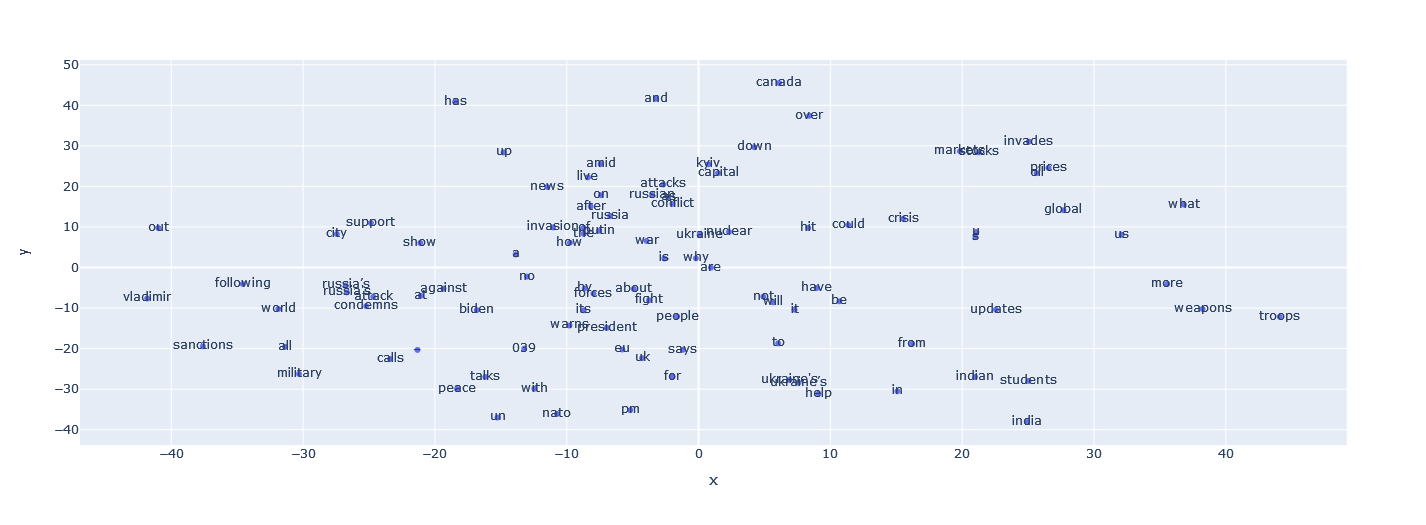

In [1]:
from IPython import display
display.Image('/Users/fSIoF/Documents/IA/NLP/embedding2D.png')


### Notas
* Se esperaba una relación entre *military, weapons y troops*
* Se encuentra similaridad entre las siguientes palabras:
    * *weapons - troops*
    * *attacks - russian - conflict*
    * *Russia - condemns*
    * *Indian - India - Students*